In [1]:
import sys

In [2]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np

scv.settings.verbosity = 3
scv.settings.set_figure_params("scvelo")
cr.settings.verbosity = 2

In [3]:
import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

In [4]:
import os
os.getcwd()

'/Volumes/groups/tanaka/People/current/jiwang/projects/heart_regeneration/scripts'

In [114]:
input_Dir = "../results/sc_multiome_R13591_intron.exon.20220729/RNA_velocity/"
outDir = "../results/sc_multiome_R13591_intron.exon.20220729/RNA_velocity/CM_subtypes_v1.5"

In [115]:
data_seuratObj = os.path.join(input_Dir, 
                              "RNAmatrix_umap_kalisto.velocity_spliced_unspliced_CMsutypes_v1.5.h5ad")
adata = sc.read_h5ad(data_seuratObj, chunk_size=6000)

In [116]:
adata

AnnData object with n_obs × n_vars = 6373 × 12446
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'iscell_dd', 'iscell_ed', 'condition', 'percent.mt', 'RNA_snn_res.0.7', 'seurat_clusters', 'RNA_snn_res.0.5', 'pANN_0.25_0.02_773', 'DF.classifications_0.25_0.02_773', 'pANN_0.25_0.01_606', 'DF.classifications_0.25_0.01_606', 'pANN_0.25_0.005_511', 'DF.classifications_0.25_0.005_511', 'pANN_0.25_0.005_610', 'DF.classifications_0.25_0.005_610', 'pANN_0.25_0.005_543', 'DF.classifications_0.25_0.005_543', 'subtypes', 'time', 'cell.ids', 'cell.id', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'celltypes'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'unspliced_features'
    obsm: 'X_umap'
    layers: 'spliced', 'unspliced'

In [117]:
adata.layers.keys()

KeysView(Layers with keys: spliced, unspliced)

In [118]:
adata.obs['condition']= adata.obs['condition'].astype('category') # change the condition into category type
adata.obs['celltypes']= adata.obs['celltypes'].astype('category')
adata.obs['seurat_clusters']= adata.obs['seurat_clusters'].astype('category')

In [119]:
adata.obs['condition']

AAACATGCAGCACCAT-1_1_1     Amex_scRNA_d0
AAACCGAAGATTCCTT-1_1_1     Amex_scRNA_d0
AAACCGGCACAATGTT-1_1_1     Amex_scRNA_d0
AAACGGATCTGCAAGT-1_1_1     Amex_scRNA_d0
AAAGCAAGTACCGTAA-1_1_1     Amex_scRNA_d0
                               ...      
TTTGTCTAGGACCGCT-1        Amex_scRNA_d14
TTTGTGGCACCGTTCC-1        Amex_scRNA_d14
TTTGTGGCATCATGTG-1        Amex_scRNA_d14
TTTGTGTTCATGGCTG-1        Amex_scRNA_d14
TTTGTTGGTCTAGCTT-1        Amex_scRNA_d14
Name: condition, Length: 6373, dtype: category
Categories (5, object): ['Amex_scRNA_d0', 'Amex_scRNA_d1', 'Amex_scRNA_d14', 'Amex_scRNA_d4', 'Amex_scRNA_d7']

In [120]:
adata.obs['celltypes']

AAACATGCAGCACCAT-1_1_1     CM_ven_Robo2
AAACCGAAGATTCCTT-1_1_1    CM_ven_Cav3_1
AAACCGGCACAATGTT-1_1_1        CM_Prol_3
AAACGGATCTGCAAGT-1_1_1     CM_ven_Robo2
AAAGCAAGTACCGTAA-1_1_1     CM_ven_Robo2
                              ...      
TTTGTCTAGGACCGCT-1            CM_Prol_1
TTTGTGGCACCGTTCC-1         CM_ven_Robo2
TTTGTGGCATCATGTG-1            CM_Prol_1
TTTGTGTTCATGGCTG-1         CM_ven_Robo2
TTTGTTGGTCTAGCTT-1         CM_ven_Robo2
Name: celltypes, Length: 6373, dtype: category
Categories (6, object): ['CM_IS', 'CM_Prol_1', 'CM_Prol_3', 'CM_Prol_IS', 'CM_ven_Cav3_1', 'CM_ven_Robo2']

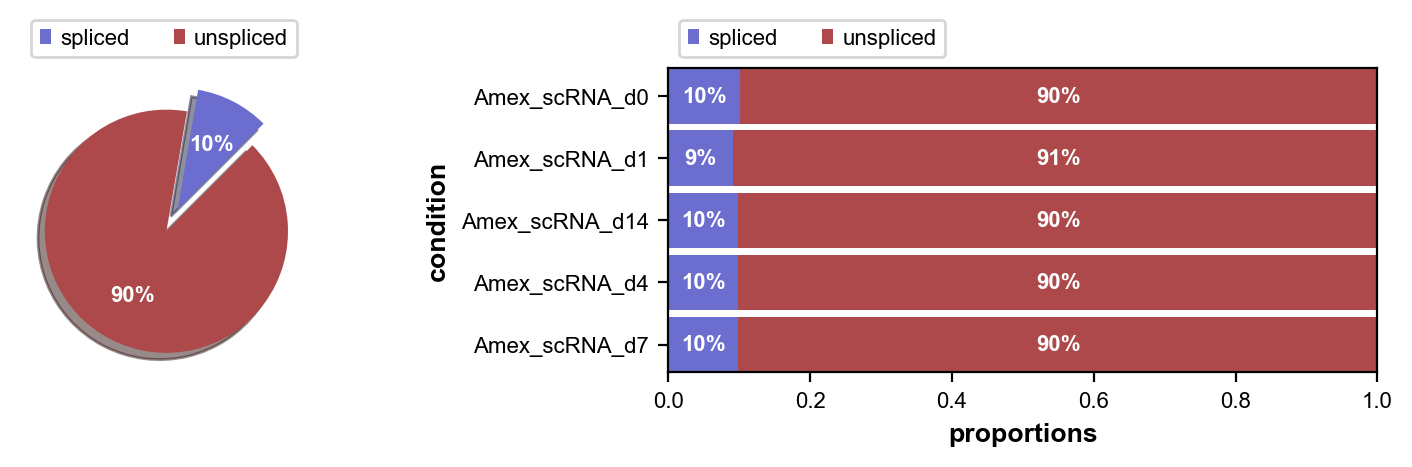

In [122]:
#adata = cr.datasets.pancreas()
scv.pl.proportions(adata, groupby='condition')

In [123]:
scv.pp.filter_and_normalize(adata, 
                            min_shared_counts=20, n_top_genes=3000, 
                            flavor = 'seurat', 
                            layers_normalize={'X', 'spliced', 'unspliced'}) # by specifying layers_normalize to renormalize the counts 
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

Filtered out 4348 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 3000 highly variable genes.
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [124]:
parameters = '_topGenes.3000_n.neighbors.10'

In [125]:
#this below line is important!! no old umaps and pcas
#scv.pp.log1p(adata)
#sc.tl.pca(adata, svd_solver='arpack')
#sc.pl.pca_variance_ratio(adata, log=True)


In [126]:
#sc.pp.neighbors(adata, n_neighbors=20, n_pcs=30)
#sc.tl.paga(adata,  groups = 'celltypes')
#sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
#sc.tl.umap(adata, init_pos='paga')
#sc.pl.umap(adata, frameon=False, legend_loc='on data', title='', save='a10222_celltypes_ok.pdf')

In [127]:
#sc.pl.umap(adata)

In [128]:


#sc.tl.pca(adata)
#sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
#scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

In [129]:
adata


AnnData object with n_obs × n_vars = 6373 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'iscell_dd', 'iscell_ed', 'condition', 'percent.mt', 'RNA_snn_res.0.7', 'seurat_clusters', 'RNA_snn_res.0.5', 'pANN_0.25_0.02_773', 'DF.classifications_0.25_0.02_773', 'pANN_0.25_0.01_606', 'DF.classifications_0.25_0.01_606', 'pANN_0.25_0.005_511', 'DF.classifications_0.25_0.005_511', 'pANN_0.25_0.005_610', 'DF.classifications_0.25_0.005_610', 'pANN_0.25_0.005_543', 'DF.classifications_0.25_0.005_543', 'subtypes', 'time', 'cell.ids', 'cell.id', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'celltypes', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'unspliced_features', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'pca', 'neighbors'
    obsm: 'X_umap', 'X_pca'
    varm: 'PC

In [130]:
#adata.var['velocity_genes']["NOX4-AMEX60DD049619"] = True

In [131]:
#adata.var['velocity_genes']

In [132]:
scv.tl.recover_dynamics(adata, n_jobs=10, max_iter=10) 

recovering dynamics (using 10/10 cores)
    finished (0:00:27) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [133]:
adata 

AnnData object with n_obs × n_vars = 6373 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'iscell_dd', 'iscell_ed', 'condition', 'percent.mt', 'RNA_snn_res.0.7', 'seurat_clusters', 'RNA_snn_res.0.5', 'pANN_0.25_0.02_773', 'DF.classifications_0.25_0.02_773', 'pANN_0.25_0.01_606', 'DF.classifications_0.25_0.01_606', 'pANN_0.25_0.005_511', 'DF.classifications_0.25_0.005_511', 'pANN_0.25_0.005_610', 'DF.classifications_0.25_0.005_610', 'pANN_0.25_0.005_543', 'DF.classifications_0.25_0.005_543', 'subtypes', 'time', 'cell.ids', 'cell.id', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'celltypes', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'unspliced_features', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scali

In [134]:
# save the velocity result
# adata.write(os.path.join(outDir, 'my_results_velocity_recover_dynamics.h5ad'), compression="gzip")

In [135]:
# reload the calculated velocity from tl.recover_dynamics
# adata = sc.read_h5ad(os.path.join(outDir,'my_results_velocity_recover_dynamics.h5ad'), chunk_size=6000)

In [136]:
scv.tl.velocity(adata, mode="dynamical")
scv.tl.velocity_graph(adata, approx = None, sqrt_transform = None)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
figure cannot be saved as pdf, using png instead.
saving figure to file ../results/sc_multiome_R13591_intron.exon.20220729/RNA_velocity/CM_subtypes_v1.5/RNAvelocity_stream_model_dynamical_topGenes.3000_n.neighbors.10.png


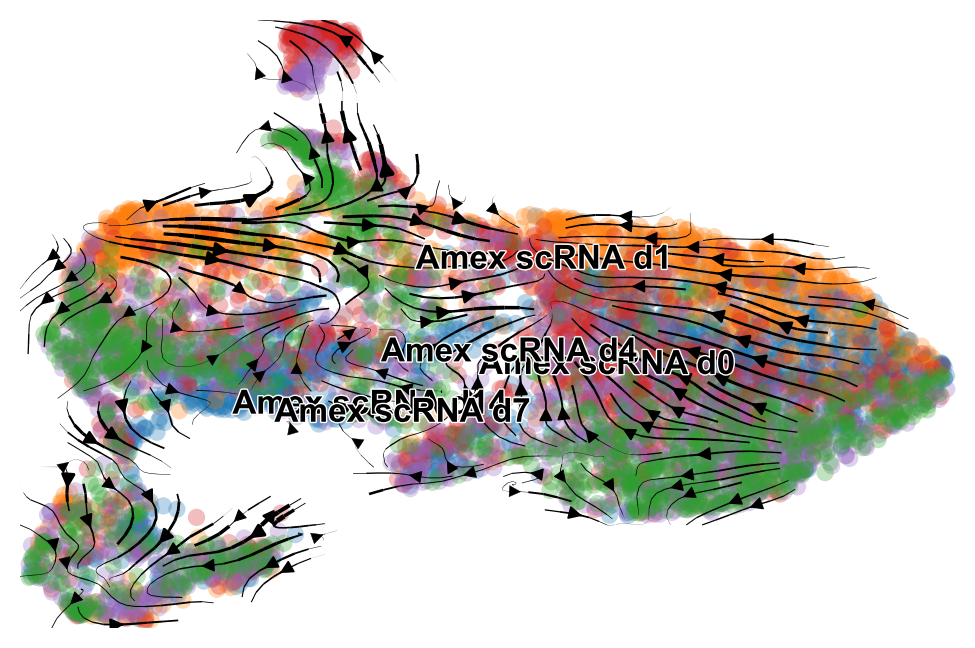

In [137]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.6, min_mass=1,
    legend_fontsize=12, title="", color = "condition", 
    save=os.path.join(outDir, "RNAvelocity_stream_model_dynamical" + parameters + ".pdf"))

In [138]:
scv.pl.velocity_embedding(adata, dpi=120, arrow_size=2, arrow_length=4)

In [139]:
parameters

'_topGenes.3000_n.neighbors.10'

In [140]:
scv.pl.velocity_embedding_grid(adata, color = 'celltypes', 
                               dpi=120, arrow_size=2, arrow_length=4,
                               save=os.path.join(outDir, 
                                                 "RNAvelocity_gridEmbedding_model_dynamical" + parameters + ".pdf")
                              )

saving figure to file ../results/sc_multiome_R13591_intron.exon.20220729/RNA_velocity/CM_subtypes_v1.5/RNAvelocity_gridEmbedding_model_dynamical_topGenes.3000_n.neighbors.10.pdf


In [141]:
scv.tl.velocity(adata, mode="steady_state")
scv.tl.velocity_graph(adata, approx = None, sqrt_transform = None)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
figure cannot be saved as pdf, using png instead.
saving figure to file ../results/sc_multiome_R13591_intron.exon.20220729/RNA_velocity/CM_subtypes_v1.5/RNAvelocity_stream_steadystat_topGenes.3000_n.neighbors.10.png


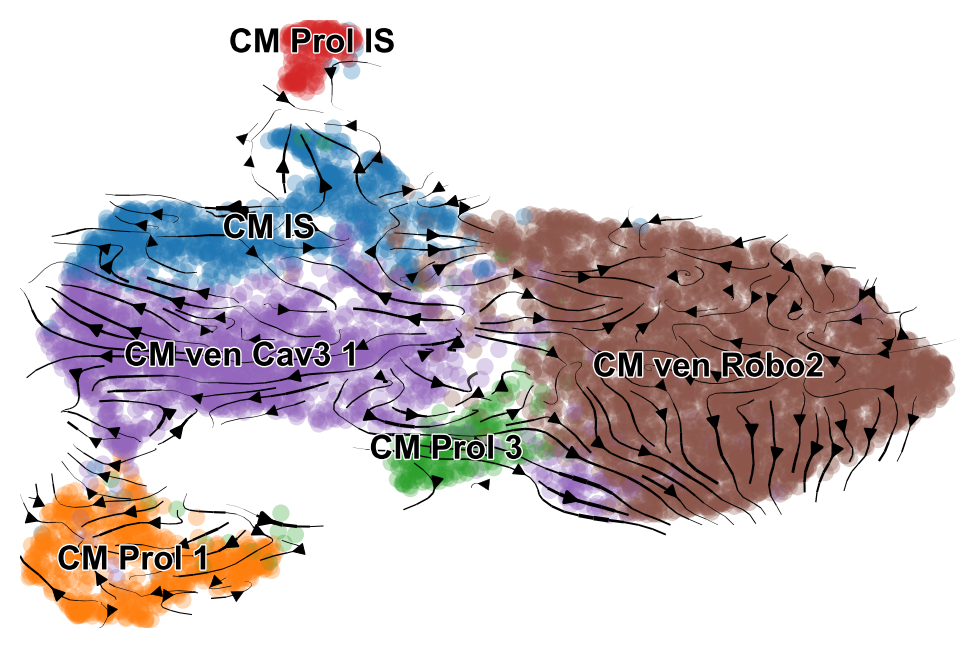

In [142]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.6, min_mass=1,
    legend_fontsize=12, title="", color = "celltypes",
    save=os.path.join(outDir, "RNAvelocity_stream_steadystat" + parameters + ".pdf")
)

saving figure to file ../results/sc_multiome_R13591_intron.exon.20220729/RNA_velocity/CM_subtypes_v1.5/RNAvelocity_grid_model_steadystat_topGenes.3000_n.neighbors.10.pdf


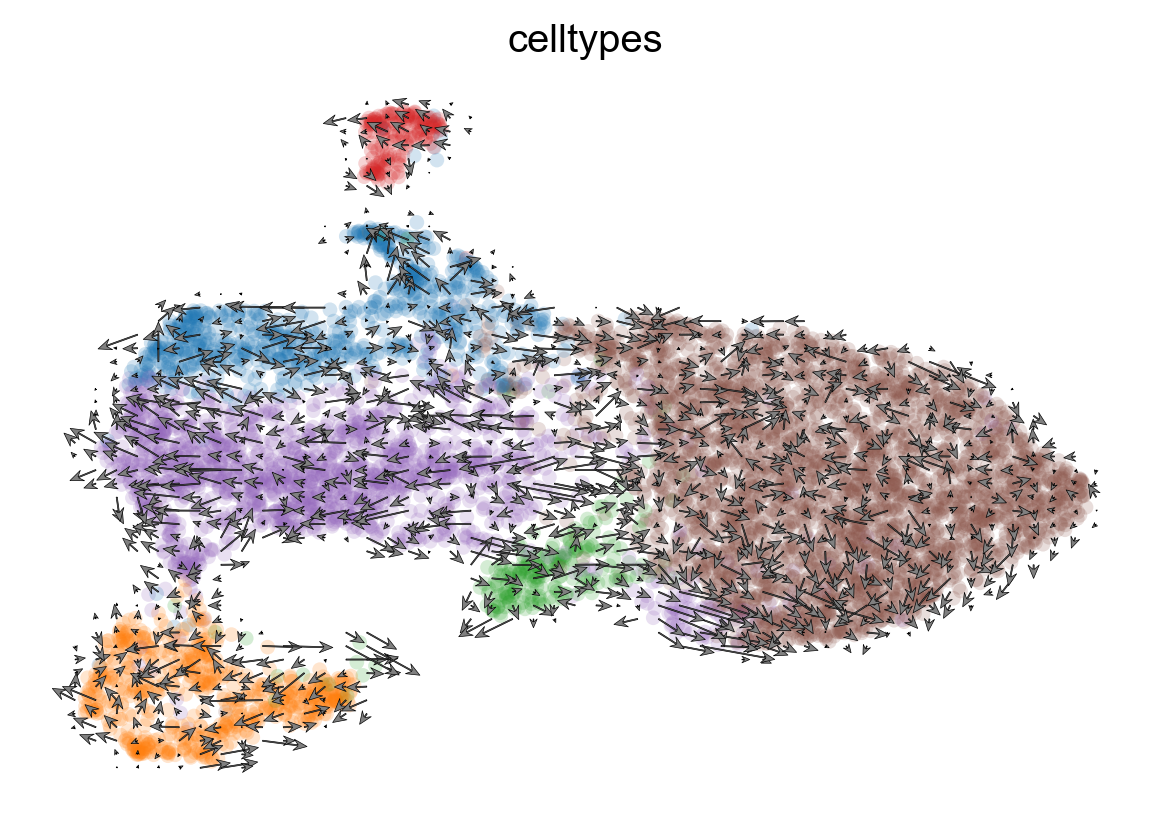

In [143]:
scv.pl.velocity_embedding_grid(adata, 
                               basis="umap", smooth=0.5, min_mass=1, n_neighbors = 10,
                               color = 'celltypes', dpi=120, arrow_size=2, arrow_length=5, 
                               save=os.path.join(outDir, "RNAvelocity_grid_model_steadystat" + parameters + ".pdf")
                              )

In [144]:
scv.tl.velocity(adata, mode="stochastic")
scv.tl.velocity_graph(adata)


computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ../results/sc_multiome_R13591_intron.exon.20220729/RNA_velocity/CM_subtypes_v1.5/RNAvelocity_stream_stochastic_topGenes.3000_n.neighbors.10.pdf


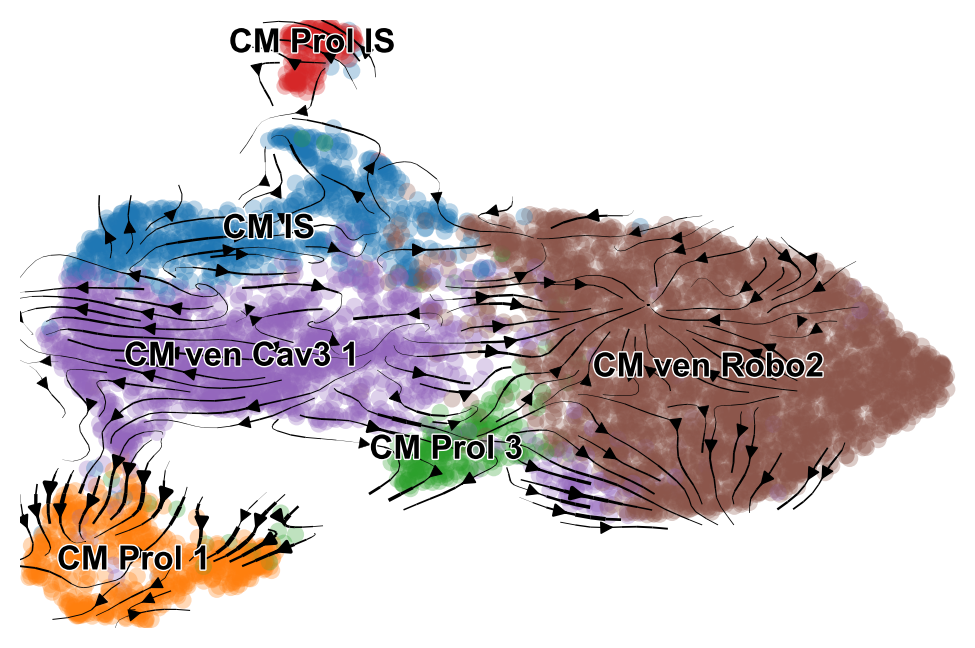

In [145]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.6, min_mass=1,
    legend_fontsize=12, title="", color = "celltypes",
    save=os.path.join(outDir, "RNAvelocity_stream_stochastic" + parameters + ".pdf")
)

saving figure to file ../results/sc_multiome_R13591_intron.exon.20220729/RNA_velocity/CM_subtypes_v1.5/RNAvelocity_grid_model_stochastic_topGenes.3000_n.neighbors.10.pdf


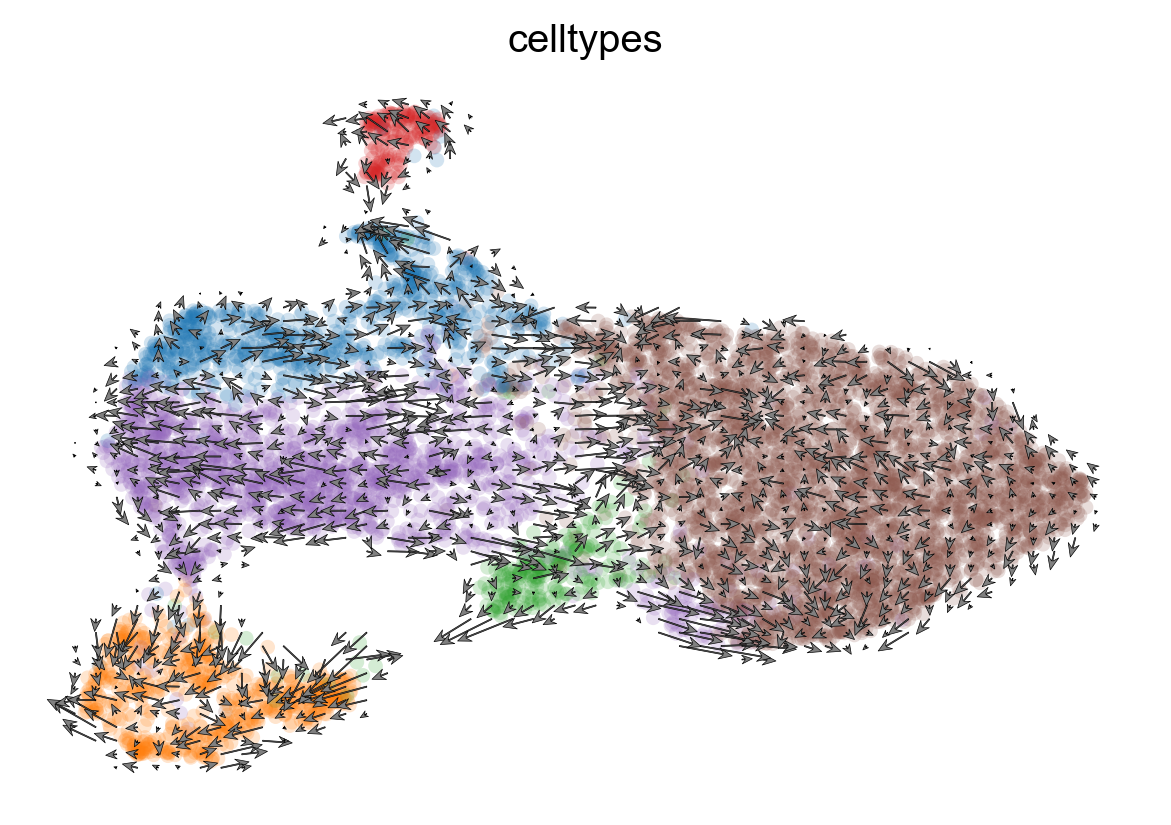

In [146]:
scv.pl.velocity_embedding_grid(adata, 
                               basis="umap", smooth=0.5, min_mass=1, n_neighbors = 10,
                               legend_fontsize=12,
                               color = 'celltypes', dpi=120, arrow_size=2, arrow_length=5, 
                               save=os.path.join(outDir, "RNAvelocity_grid_model_stochastic" + parameters + ".pdf")
                              )

In [ ]:
# compare three models and it seems that the steady state works relatively better for root and terminal cells

In [ ]:
scv.tl.velocity(adata, mode="dynamical") # test dynamical model
#scv.tl.velocity(adata, mode="steady_state")
#scv.tl.velocity(adata, mode="stochastic") # test dynamical model
scv.tl.velocity_graph(adata)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "condition"
)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.4, min_mass=1,
    legend_fontsize=12, title="", color = "celltypes"
)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.1, min_mass=0.2,
    legend_fontsize=12, title="", color = "condition"
)

In [ ]:
adata

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="pca", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "condition"
)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="pca", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "celltypes"
)

In [ ]:
print(adata.var.velocity_genes.sum()) # check the genes used for RNA velocity

In [ ]:
## top genes
top_genes = adata.var.sort_values('fit_likelihood', ascending=False).index[:20]
scv.pl.scatter(adata, basis=top_genes, color="condition", wspace=1, hspace=1, nrows=4, ncols=5)

In [ ]:
# scv.pl.velocity_embedding(adata, basis="umap", arrow_length=3, arrow_size=2, dpi=120, color = "condition")
# scv.pl.velocity_embedding(adata, basis='umap',color='cell.type.fine',arrow_length=5)
# scv.pl.velocity_embedding_grid(adata, basis='umap',color='seurat_clusters',arrow_length=5)

In [ ]:
#####latent time
#scv.tl.terminal_states(adata)
#scv.tl.latent_time(adata)
#scv.pl.scatter(adata, color='latent_time',color_map='gnuplot', size=80)
#scv.pl.scatter(adata, color=[ 'root_cells', 'end_points'])

In [ ]:
# save the scvelo result
adata
adata.write(os.path.join(outDir,'my_results_scvelo_stochastic.h5ad'), compression="gzip")

In [ ]:
################# 
# Run CellRank using kernel functions -- https://cellrank.readthedocs.io/en/stable/kernels_and_estimators.html
# 
#################

In [ ]:
adata = sc.read_h5ad(os.path.join(outDir,'my_results_scvelo_stochastic.h5ad'), chunk_size=6000)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "clusters"
)

In [ ]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['clusters']  == '0')[0]
sc.tl.dpt(adata, n_branchings = 2)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "dpt_pseudotime",
    dpi = 120,
    save=os.path.join(outDir, "scvelo_dpt_pseudotime.pdf")
)

In [ ]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.4, min_mass=1,
    legend_fontsize=12, title="", color = "condition",
    dpi = 120, 
    save=os.path.join(outDir, "scvelo_condition.pdf")
)

In [ ]:
scv.pl.scatter(adata, basis="umap", c="condition",
                dpi = 120, 
                save=os.path.join(outDir, "scatter_condition.pdf")
              )

In [ ]:
from cellrank.tl.kernels import VelocityKernel
vk = VelocityKernel(adata)
pk = cr.tl.kernels.PseudotimeKernel(adata)

In [ ]:
# Compute a transition matrix
pk.compute_transition_matrix()
vk.compute_transition_matrix()

In [ ]:
# Combining multiple kernels
from cellrank.tl.kernels import ConnectivityKernel
ck = ConnectivityKernel(adata).compute_transition_matrix()

In [ ]:
combined_kernel = 0.5 * vk + 0.3 *pk + 0.2 * ck
#combined_kernel = 0.8 * vk + 0.2 * ck
#combined_kernel = 0.8 * vk + 0.2 * ck

In [ ]:
# Initialize an estimator
from cellrank.tl.estimators import GPCCA

g = GPCCA(combined_kernel)
print(g)

In [ ]:
# Compute a matrix decomposition
g.compute_schur(n_components=6) # method with 'brandts', otherwise kernel will be killed; take really a long time for 40k cells 
g.plot_spectrum()

In [ ]:
# Infer terminal states
g.compute_macrostates(n_states = 8, cluster_key="clusters")
g.plot_macrostates()

In [ ]:
g.plot_macrostates(same_plot=False, discrete=True)

In [ ]:
g.set_terminal_states({"Neurons": adata[adata.obs["clusters"] == "8"].obs_names}, add_to_existing=False)
g.set_terminal_states({"FP": adata[adata.obs["clusters"] == "5"].obs_names}, add_to_existing=True)

In [ ]:
g.compute_absorption_probabilities()

In [ ]:
g.plot_absorption_probabilities(discrete = True, 
                                same_plot = False, 
                                save=os.path.join(outDir, "cellrank_absorption_probs_vk0.5_pk0.3_ck0.2.pdf"))

In [ ]:
fp_drivers = g.compute_lineage_drivers(lineages="FP", return_drivers=True)
fp_drivers.sort_values(by="FP_corr", ascending=False)

In [ ]:
g.plot_lineage_drivers("FP", n_genes=50,
                      #save=os.path.join(outDir, "cellrank_FP_drivers.pdf")
                       save = 'cellrank_fp_drivers.pdf'
                      )

In [ ]:
nr_drivers = g.compute_lineage_drivers(lineages="Neurons", return_drivers=True)
nr_drivers.sort_values(by="Neurons_corr", ascending=False)

In [ ]:
g.plot_lineage_drivers("Neurons", n_genes=50,
                       #save=os.path.join(outDir, "cellrank_Neurons_drivers.pdf")
                       save = 'cellrank_np_drivers.pdf'
                      )


In [ ]:
fp_drivers.to_csv(os.path.join(outDir,'res_fp_drivers.csv'))
nr_drivers.to_csv(os.path.join(outDir,'res_neuron_drivers.csv'))

In [ ]:
################# 
# Run CellRank using basic functions -- https://cellrank.readthedocs.io/en/stable/cellrank_basics.html
#################

In [ ]:
adata
scv.pl.velocity_embedding_stream(
    adata, basis="umap", smooth=0.5, min_mass=1,
    legend_fontsize=12, title="", color = "clusters"
)

In [ ]:
# Identify terminal states
# it did not work well, see issue in https://github.com/theislab/cellrank/issues/399
cr.tl.terminal_states(adata, 
                      n_states = 2, 
                      cluster_key="clusters", 
                      weight_connectivities=0.2, 
                      force_recompute = True)

In [ ]:
cr.pl.terminal_states(adata)

In [ ]:
# Identify initial states
cr.tl.initial_states(adata, 
                     n_states = 1, 
                     cluster_key="clusters")
cr.pl.initial_states(adata, discrete=True)

In [ ]:
# Compute fate maps
cr.tl.lineages(adata)
cr.pl.lineages(adata, same_plot=False)

In [ ]:
cr.pl.lineages(adata, same_plot=False, 
              save=os.path.join(input_Dir, "CellRank_fatemap_stochasticModel.pdf"))

In [ ]:
cr.pl.log_odds(
    adata,
    lineage_1="5",
    lineage_2="10",
    time_key="time",
    keys=["condition"],
    threshold=0,
    size=2,
    xticks_step_size=4,
    figsize=(9, 4),
)

In [ ]:
### Directed PAGA not used 

In [ ]:
scv.tl.recover_latent_time(
    adata, root_key="initial_states_probs", end_key="terminal_states_probs"
)

In [ ]:
scv.tl.paga(
    adata,
    groups="condition",
    root_key="initial_states_probs",
    end_key="terminal_states_probs",
    use_time_prior="velocity_pseudotime",
)


In [ ]:
cr.pl.cluster_fates(
    adata,
    mode="paga_pie",
    cluster_key="condition",
    basis="umap",
    legend_kwargs={"loc": "top right out"},
    legend_loc="top left out",
    node_size_scale=5,
    edge_width_scale=1,
    max_edge_width=4,
    title="directed PAGA",
    save=os.path.join(input_Dir, "CellRank_PAGA_fateProb_condition_umapV3.pdf")
)


In [ ]:
scv.tl.paga(
    adata,
    groups="clusters",
    root_key="initial_states_probs",
    end_key="terminal_states_probs",
    use_time_prior="velocity_pseudotime",
)
cr.pl.cluster_fates(
    adata,
    mode="paga_pie",
    cluster_key="clusters",
    basis="umap",
    legend_kwargs={"loc": "top right out"},
    legend_loc="top left out",
    node_size_scale=5,
    edge_width_scale=1,
    max_edge_width=4,
    title="directed PAGA",
    save=os.path.join(input_Dir, "CellRank_PAGA_fateProb_clusters_umapV3.pdf"),
)
